# РОБОТА із ЗОБРАЖЕННЯМИ 
## Файл: Image_03_002
## Гістограма зображення

### Еквалізація гістограми

In [1]:
## Завантаження пакетів
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
plt.rcParams['font.size'] = 10

In [2]:
## Завантаження файлу зображення
path = './IMAGES/'
filename = 'Lenna.png' 
test_im = io.imread(path + filename)

## Визначення стркутури та розміру зображення
print ('IMAGE SHAPE', test_im.shape, 'IMAGE SIZE', test_im.size)
rows_num = test_im.shape[0] ## кількість рядків
clms_num = test_im.shape[1] ## кількість колонок
pix_num = rows_num*clms_num ## кількість пікселів
bins = 256 ## кількість рівнів яскравості
print ('ROWS NUMBER', rows_num, 'CLMS NUMBER', clms_num, 'PIX NUMBER', pix_num, 'Bins',bins)

IMAGE SHAPE (512, 512, 3) IMAGE SIZE 786432
ROWS NUMBER 512 CLMS NUMBER 512 PIX NUMBER 262144 Bins 256


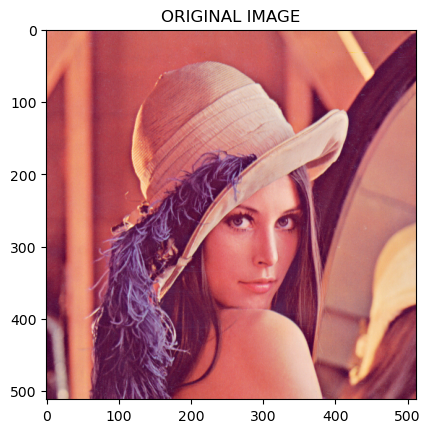

In [3]:
## Вивід оррігінального зображення на екран
plt.title('ORIGINAL IMAGE')
plt.imshow(test_im)
plt.show()

#### Формування напівтонового зображення

Gray_Im SAPE (512, 512, 3) Gray_Im SIZE 262144
Intensity MIN =  24 Intensity MAX =  245


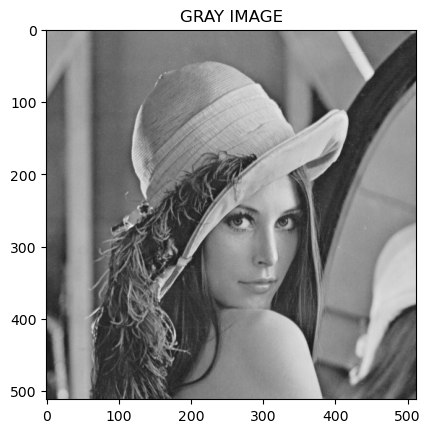

In [4]:
gray_im = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        gray_im [i, j, :] = 0.299*test_im [i, j, 0]+0.587*test_im [i, j, 1]+0.114*test_im [ i, j, 2]        

## L_Min, L_Max 
L_min = np.amin(gray_im [:,:,0])   
L_max = np.amax(gray_im [:,:,0])      
print ('Intensity MIN = ', L_min , 'Intensity MAX = ', L_max)

plt.title('GRAY IMAGE')
plt.imshow(gray_im)
plt.show()

#### Побудова гістограми зображення

Gray_Im SAPE (512, 512, 3) Gray_Im SIZE 262144
L_Gisto SHAPE (256,) L_Gisto SIZE 256
Gisto MIN =  0 Gisto MAX =  2782


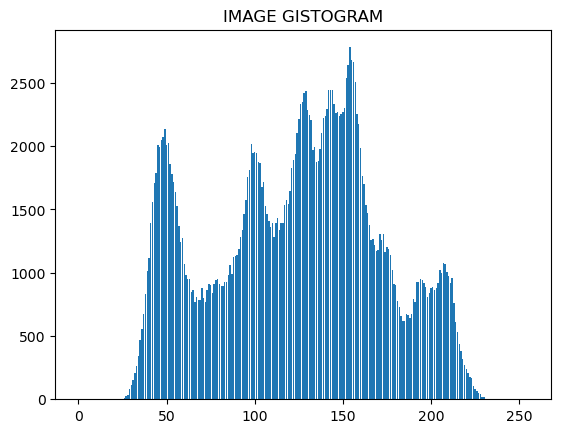

In [5]:
## Визначення масиву для гістограми
L_gisto = np.zeros (bins, dtype=np.uint32)
print ('Gray_Im SAPE', gray_im.shape, 'Gray_Im SIZE', rows_num * clms_num)
print ('L_Gisto SHAPE', L_gisto.shape, 'L_Gisto SIZE', L_gisto.size)

## Формування гістограми
for i in  range (rows_num):
    for j in  range (clms_num):
        L_gisto[gray_im [i, j, 0]] += 1 

## MIN, MAX гістограми
L_gisto_min = np.amin(L_gisto)        
L_gisto_max = np.amax(L_gisto)        
print ('Gisto MIN = ',L_gisto_min , 'Gisto MAX = ', L_gisto_max )

pix_index = np.arange(256) 

fig, ax = plt.subplots()
ax.bar(pix_index, L_gisto)
ax.set_title('IMAGE GISTOGRAM')
plt.show()        


#### Еквалізація гістограми

Нормализован сума 255.0
Мінімальне значення 0 | Максимальне значення 255


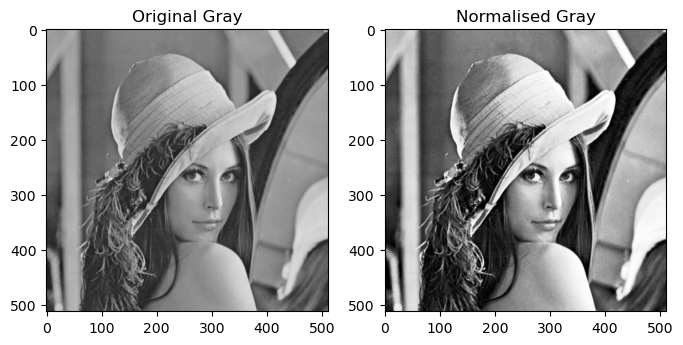

In [6]:
## https://habr.com/ru/post/244507/
Norm_L_gisto = np.zeros ( (256), dtype=np.float32)
## Розраховуємо гістограму та нормуємо до максимального значення 255
Norm_L_gisto [:] =  255.0*L_gisto[:]/pix_num
norm_sum = np.sum(Norm_L_gisto)
print ('Нормализован сума', norm_sum)

## Кумулятивна гістограма
Cum_gisto = np.zeros ((256), dtype=np.uint8)
for i in  range (bins):
    Cum_gisto[i] = np.uint8(np.sum(Norm_L_gisto[0:i])+0.5)
    ## print (i, Norm_L_gisto[i], Cum_gisto[i])

print ('Мінімальне значення', np.amin(Cum_gisto),'| Максимальне значення', np.amax(Cum_gisto))    
## Нормалізоване зображення
norm_image = np.zeros ( (rows_num, clms_num, 3), dtype=np.uint8)    
for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        norm_image [i, j, : ] = Cum_gisto[gray_im [i, j, 0]] 

        
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

ax = axes.ravel()
ax[0].imshow(gray_im)
ax[0].set_title("Original Gray")
ax[1].imshow(norm_image)
ax[1].set_title("Normalised Gray")
plt.show()

#### Формування гістограми перетвореного зображення

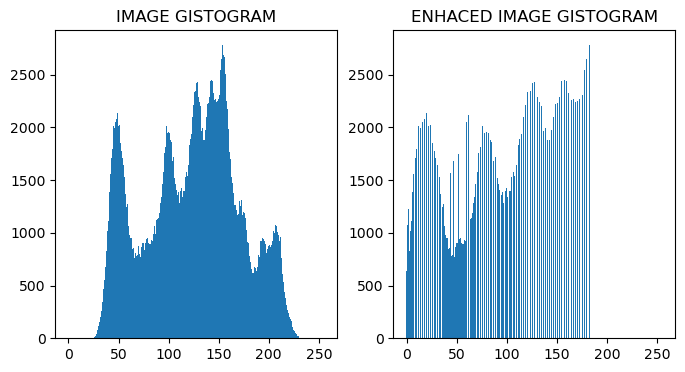

In [21]:
## Визначення масиву для нової гістограми
L_gisto_enh = np.zeros ( (bins), dtype=np.uint32)

for i in  range (rows_num):
    for j in  range (clms_num):
        # Gray image
        L_gisto_enh[norm_image [i, j, 0]] += 1 

pix_index = np.arange(256) 
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax = axs[0]
ax.bar(pix_index, L_gisto)
ax.set_title('IMAGE GISTOGRAM')
ax = axs[1]
ax.bar(pix_index, L_gisto_enh)
ax.set_title('ENHACED IMAGE GISTOGRAM')
plt.show()        